In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("ECOAS_MachineLearning_202013_puntajes.csv", encoding="latin-1")

#Convert cauqlitative variables to quantitative 
data['Categoria'] = pd.factorize(data.Categoria)[0]
data['Subcategoria'] = pd.factorize(data.Subcategoria)[0]
data['TipoProfesor'] = pd.factorize(data.TipoProfesor)[0]
data['Departamento'] = pd.factorize(data.Departamento)[0]
data['Rectoría'] = pd.factorize(data.Rectoría)[0]

# data.info()

In [2]:
# df = pd.DataFrame(data,columns=['DocumentSentiment','Categoria','Subcategoria', 'TipoProfesor', 'Departamento', 'Rectoría', 'APR', 'RET', 'REC'])
df = pd.DataFrame(data,columns=['DocumentSentiment', 'APR', 'RET', 'REC'])

# target_names = df['DocumentSentiment'].unique().tolist()
# feature_names = df.drop(['DocumentSentiment'], axis=1).columns.tolist()

# n_targets = len(target_names)
# n_features = len(feature_names)

# X = df[feature_names]
# y = df['DocumentSentiment']

#split dataset in features and target variable
# feature_cols = ['Categoria','Subcategoria', 'TipoProfesor', 'Departamento', 'Rectoría', 'APR', 'RET', 'REC']
feature_cols = ['APR', 'RET', 'REC']
X = data[feature_cols] # Features (independent variables)
y = data.DocumentSentiment # Target variable

newY = []
for i in y:
    newY.append( int(i * 100))
    
y = newY

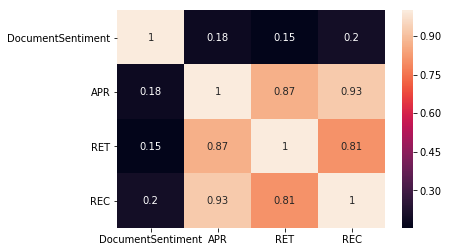

In [3]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Train models

In [4]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Split Data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# print('Shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print('Target values distribution:\nTrain:\n', y_train.value_counts(normalize=True), '\nTest:\n', y_test.value_counts(normalize=True))

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.118837818528221


In [8]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DocumentSentiment.png')
# Image(graph.create_png())

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1775660871636104


In [10]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DocumentSentiment2.png')
# Image(graph.create_png())

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1775660871636104


In [12]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DocumentSentiment3.png')
# Image(graph.create_png())

### Train Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.001,0.0001], 'C': [1, 10, 100, 1000]},
                {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, scoring='f1_macro')
clf = clf.fit(X_train, y_train)
print('Best parameters:\n', clf.best_params_)
print('\nModel parameters:\n', clf.get_params())

In [ ]:
# Evaluate
with sns.axes_style("white"):
    y_pred = clf.predict(X_test)
    print('Classification Report:\n',metrics.classification_report(y_test, y_pred))
    fig, axes = plt.subplots(1, 2, figsize=(15,8))
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=axes[0])
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=axes[1])
    axes[0].set_title('Confussion Matrix')
    axes[1].set_title('Confussion Matrix - Normalized')
    plt.show()

## Train Neural Network

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Scale features and encode target values

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69983 entries, 0 to 69982
Data columns (total 4 columns):
DocumentSentiment    69983 non-null float64
APR                  69983 non-null float64
RET                  69983 non-null float64
REC                  69983 non-null float64
dtypes: float64(4)
memory usage: 2.1 MB


,DocumentSentiment,APR,RET,REC
0,0.10,9.592593,9.666667,9.407407
1,0.30,9.592593,9.666667,9.407407
2,0.00,9.592593,9.666667,9.407407
3,0.48,9.592593,9.666667,9.407407
4,0.09,9.592593,9.666667,9.407407


In [21]:
new_y = np.array(y)
y = new_y

In [22]:
new_X = np.array(X)
X = new_X 

In [23]:
enc = OneHotEncoder(categories='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

164

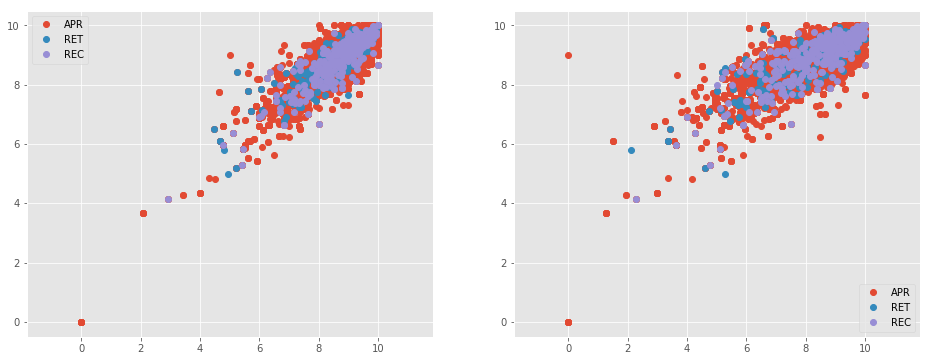

In [29]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(feature_cols):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
# plt.xlabel(feature_names[0])
# plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(feature_cols):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
# plt.xlabel(feature_names[2])
# plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [30]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 164)               1476      
Total params: 1,508
Trainable params: 1,508
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 164)               1476      
Total params: 1,580
Trainable params: 1,

In [31]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


KeyboardInterrupt: 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))